Found 80000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


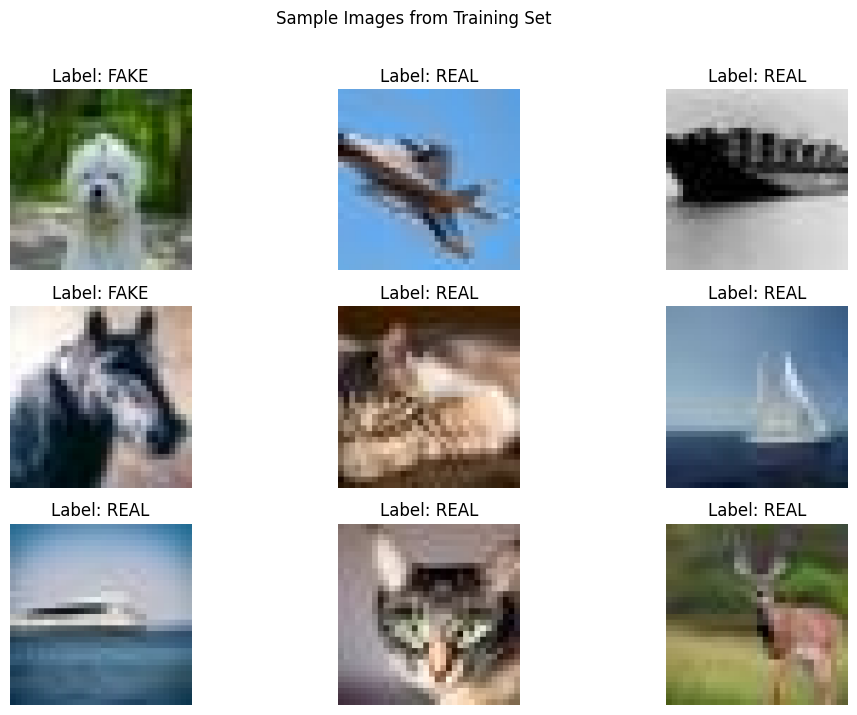

In [8]:
# loading data and showing samples

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

data_dir = 'C:/Users/whysu/cifake/train'

datagen = ImageDataGenerator(
    rescale=1.0 / 255,  
    validation_split=0.2  
)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

def show_samples(generator, title):
    x, y = next(generator)  
    plt.figure(figsize=(12, 8))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(x[i])
        plt.title(f'Label: {"REAL" if y[i] == 0 else "FAKE"}')
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

show_samples(train_generator, "Sample Images from Training Set")

Found 80000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


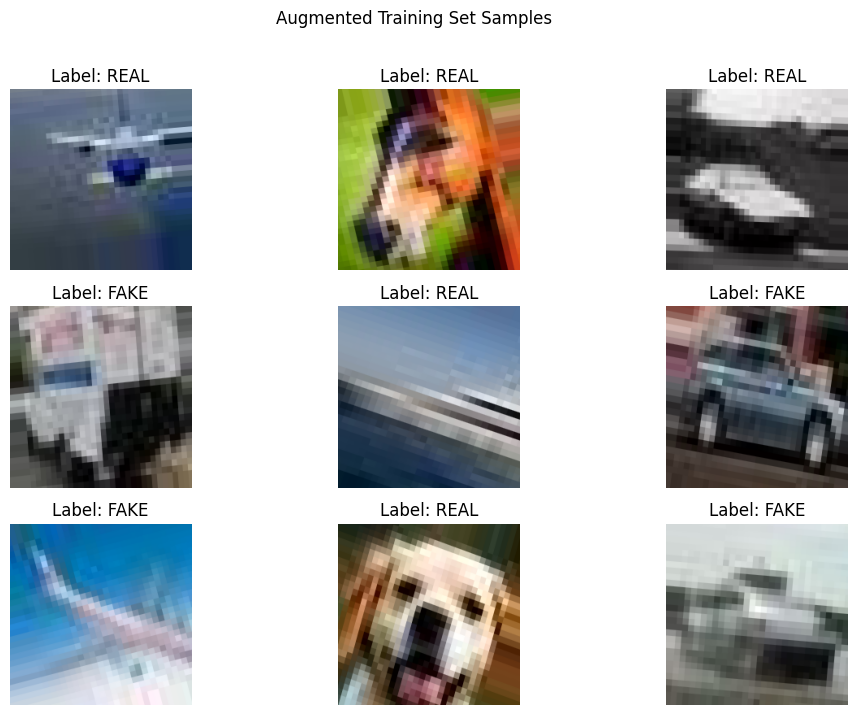

In [10]:
#img data generator
#augmenting img to improve generalisation
datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    validation_split=0.2,
    rotation_range=20,          
    width_shift_range=0.1,      
    height_shift_range=0.1,     
    horizontal_flip=True,       
    zoom_range=0.2              
)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

show_samples(train_generator, "Augmented Training Set Samples")

In [12]:
#developing cnn
import tensorflow as tf
from tensorflow.keras import layers, models

def create_custom_cnn(input_shape=(224, 224, 3)):
    model = models.Sequential()

    model.add(layers.Input(shape=input_shape))

    # conv2d to help notice features
    # maxpooling to help overfitting
    
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))

    
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    
    model.add(layers.Conv2D(256, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))  
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.5))
    
    model.add(layers.Dense(1, activation='sigmoid'))

    return model

model = create_custom_cnn()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 24, 24, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 36864)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       4,718,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,115,457 (19.51 MB)

 Trainable params: 5,115,457 (19.51 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, min_lr=1e-6)

# train
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=2,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/2
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 25165s 10s/step - accuracy: 0.7714 - loss: 0.4908 - val_accuracy: 0.8935 - val_loss: 0.2634 - learning_rate: 0.0010
Epoch 2/2
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 2257s 902ms/step - accuracy: 0.8801 - loss: 0.2977 - val_accuracy: 0.9097 - val_loss: 0.2241 - learning_rate: 0.0010


In [17]:
val_loss, val_accuracy = model.evaluate(val_generator)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

625/625 ━━━━━━━━━━━━━━━━━━━━ 205s 328ms/step - accuracy: 0.9096 - loss: 0.2227
Validation Loss: 0.22501282393932343
Validation Accuracy: 0.9093999862670898


In [18]:
from sklearn.metrics import classification_report

y_true = val_generator.classes
y_pred = (model.predict(val_generator) > 0.5).astype("int32")

print(classification_report(y_true, y_pred, target_names=['REAL', 'FAKE']))

625/625 ━━━━━━━━━━━━━━━━━━━━ 211s 338ms/step
              precision    recall  f1-score   support

        REAL       0.50      0.51      0.51     10000
        FAKE       0.50      0.48      0.49     10000

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


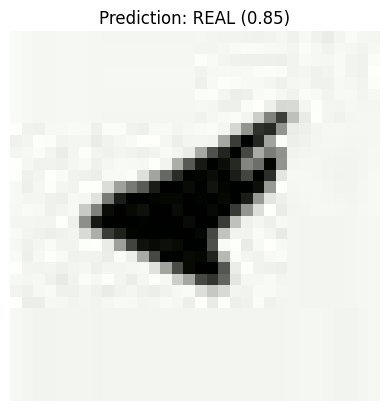

Image is classified as REAL with confidence 0.85


In [29]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load and preprocess the image
def load_and_preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

def predict_image(model, image_path):
    img_array = load_and_preprocess_image(image_path)
    # Get the prediction probability (closer to 1 means FAKE, closer to 0 means REAL)
    prediction = model.predict(img_array)
    # Interpret the prediction
    label = "FAKE" if prediction[0][0] > 0.5 else "REAL"
    confidence = prediction[0][0] if label == "FAKE" else 1 - prediction[0][0]
    
    # Show image and prediction
    img = image.load_img(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Prediction: {label} ({confidence:.2f})")
    plt.show()

    return label, confidence

# Example usage
image_path = 'C:/Users/whysu/cifake/test/REAL/0002.jpg'  # Replace with the path to your image
label, confidence = predict_image(model, image_path)
print(f"Image is classified as {label} with confidence {confidence:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


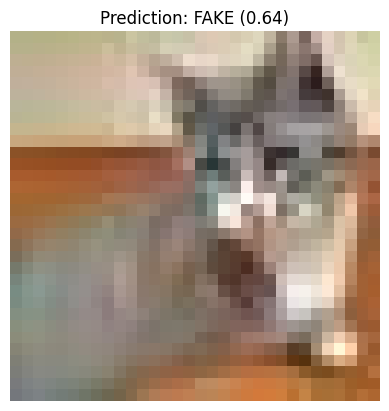

Image is classified as FAKE with confidence 0.64


In [40]:
image_path = 'C:/Users/whysu/cifake/test/FAKE/70 (4).jpg'  # Replace with the path to your image
label, confidence = predict_image(model, image_path)
print(f"Image is classified as {label} with confidence {confidence:.2f}")


#### 